# Курсовой проект по машинному обучению
## Car price prediction
## Использование произвольных автомобильных данных для анализа предсказание цен на автомобили.


### Описание признаков
   - **name**: Название автомобиля (марка и модель),
   - **company**: Компания-производитель,
   - **year**: Год выпуска автомобиля,
   - **Price**: Цена автомобиля,
   - **kms_driven**: Пробег автомобиля в километрах,
   - **fuel_type**: Тип топлива, используемого автомобилем

### Исследование данных

In [160]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [161]:
data=pd.read_csv('dataset/CAR.csv')


In [162]:
data.head(10)

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Toyota Camry 55 SE USA,Toyota,2015,15800$,150 000 km,Hybrid
1,1,Toyota Land Cruiser 200,Toyota,2015,47000$,145 000 km,Petrol
2,2,Toyota Camry 70 XSE,Toyota,2019,20500$,180 246 km,Petrol
3,3,Toyota Highlander IV (U70),Toyota,2019,45300$,108 000 km,Hybrid
4,4,Toyota Crown XVI (S235),Toyota,2023,51500$,7 750 km,Hybrid
5,5,Toyota Sequoia I Restyling,Toyota,2004,23500$,167 000 km,Petrol
6,6,Toyota RAV4 V (XA50),Toyota,2021,37500$,56 000 km,Hybrid
7,7,Toyota Avalon,Toyota,2019,30000$,27 000 km,Hybrid
8,8,Toyota Crown,Toyota,2020,35500$,57 750 km,Petrol
9,9,Toyota Sequoia,Toyota,2022,98500$,12 000 km,Petrol


In [163]:
data.shape

(883, 7)

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  883 non-null    int64 
 1   name        883 non-null    object
 2   company     882 non-null    object
 3   year        880 non-null    object
 4   Price       877 non-null    object
 5   kms_driven  882 non-null    object
 6   fuel_type   876 non-null    object
dtypes: int64(1), object(6)
memory usage: 48.4+ KB


In [165]:
backup=data.copy()

In [166]:
data.describe()

,Unnamed: 0
count,883.000000
mean,433.890147
std,247.463116
min,0.000000
25%,219.500000
50%,440.000000
75%,642.500000
max,859.000000


## Очистка данных

In [167]:
data.isnull().sum()

Unnamed: 0    0
name          0
company       1
year          3
Price         6
kms_driven    1
fuel_type     7
dtype: int64

In [168]:
data = data.dropna()

In [169]:
data.isnull().sum()

Unnamed: 0    0
name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [170]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
878    False
879    False
880    False
881    False
882    False
Length: 865, dtype: bool

In [171]:
data['Price'] = data['Price'].str.replace('$', '').astype(int)

In [172]:
data['kms_driven'] = data['kms_driven'].str.replace(' km', '').str.replace(' ', '').astype(int)


In [173]:
data['year'] = data['year'].astype(int)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 0 to 882
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  865 non-null    int64 
 1   name        865 non-null    object
 2   company     865 non-null    object
 3   year        865 non-null    int32 
 4   Price       865 non-null    int32 
 5   kms_driven  865 non-null    int32 
 6   fuel_type   865 non-null    object
dtypes: int32(3), int64(1), object(3)
memory usage: 43.9+ KB


In [175]:
data['name']=data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [176]:
data=data.reset_index(drop=True)

In [177]:
data

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Toyota Camry 55,Toyota,2015,15800,150000,Hybrid
1,1,Toyota Land Cruiser,Toyota,2015,47000,145000,Petrol
2,2,Toyota Camry 70,Toyota,2019,20500,180246,Petrol
3,3,Toyota Highlander IV,Toyota,2019,45300,108000,Hybrid
4,4,Toyota Crown XVI,Toyota,2023,51500,7750,Hybrid
...,...,...,...,...,...,...,...
860,855,Honda Fit,Honda,2003,5718,212000,Petrol
861,856,Honda Fit,Honda,2003,5718,212000,Petrol
862,857,Honda Fit,Honda,2003,5718,212000,Petrol
863,858,Honda Fit,Honda,2003,5718,212000,Petrol


In [178]:
#data.to_csv('dataset/cleaned_data_cars.csv',index = False)

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  865 non-null    int64 
 1   name        865 non-null    object
 2   company     865 non-null    object
 3   year        865 non-null    int32 
 4   Price       865 non-null    int32 
 5   kms_driven  865 non-null    int32 
 6   fuel_type   865 non-null    object
dtypes: int32(3), int64(1), object(3)
memory usage: 37.3+ KB


In [180]:
data.describe(include='all')

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
count,865.00000,865,865,865.000000,865.000000,865.000000,865
unique,NaN,323,7,NaN,NaN,NaN,9
top,NaN,Honda Fit,Honda,NaN,NaN,NaN,Petrol
freq,NaN,137,224,NaN,NaN,NaN,634
mean,430.22659,NaN,NaN,2014.848555,34825.319075,95967.344509,NaN
std,248.47923,NaN,NaN,6.366612,45734.330557,78736.059026,NaN
min,0.00000,NaN,NaN,1990.000000,2500.000000,17.000000,NaN
25%,215.00000,NaN,NaN,2012.000000,13000.000000,38000.000000,NaN
50%,432.00000,NaN,NaN,2017.000000,25000.000000,70000.000000,NaN
75%,645.00000,NaN,NaN,2019.000000,42000.000000,140000.000000,NaN


In [181]:
#data=data[data['Price']<60000]

In [182]:
data['company'].unique()

array(['Toyota', 'Honda', 'Mercedes-Benz', 'Lexus', 'BMW', 'Hyundai',
       'Kia'], dtype=object)

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
### Кодирование признаков


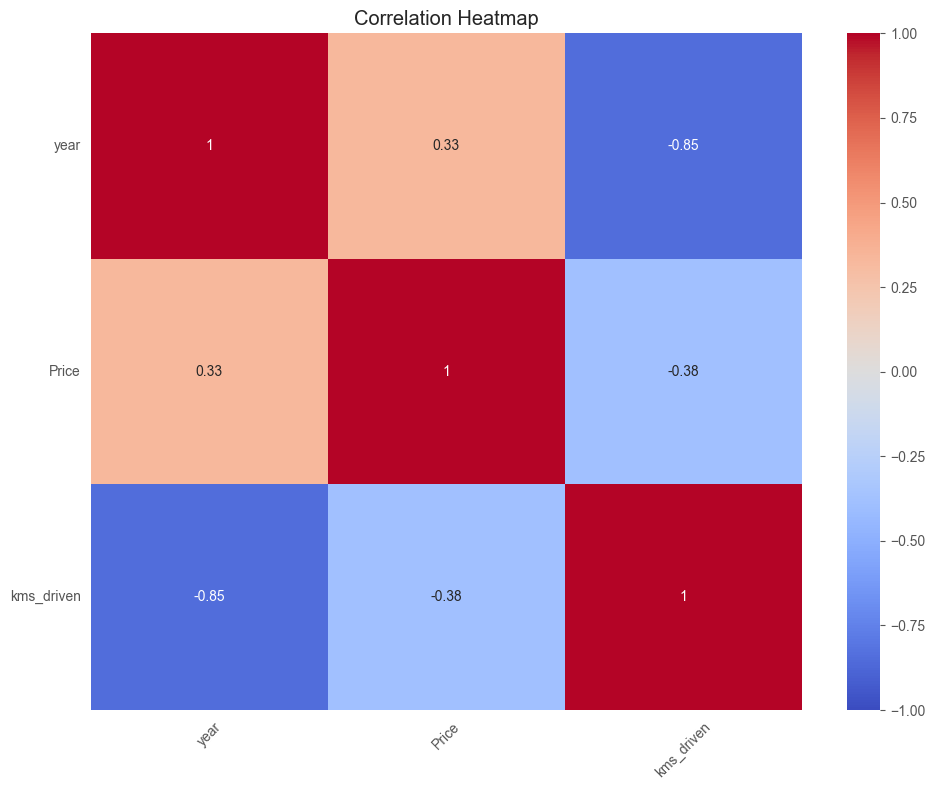

In [185]:
# Вычисление корреляций
numeric_cols = ['year', 'Price', 'kms_driven']
corr_matrix = data[numeric_cols].corr()

# Построение тепловой карты с помощью Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Построение модели 

In [186]:
X=data[['name','company','year','kms_driven','fuel_type']]
y=data['Price']

In [187]:
X

,name,company,year,kms_driven,fuel_type
0,Toyota Camry 55,Toyota,2015,150000,Hybrid
1,Toyota Land Cruiser,Toyota,2015,145000,Petrol
2,Toyota Camry 70,Toyota,2019,180246,Petrol
3,Toyota Highlander IV,Toyota,2019,108000,Hybrid
4,Toyota Crown XVI,Toyota,2023,7750,Hybrid
...,...,...,...,...,...
860,Honda Fit,Honda,2003,212000,Petrol
861,Honda Fit,Honda,2003,212000,Petrol
862,Honda Fit,Honda,2003,212000,Petrol
863,Honda Fit,Honda,2003,212000,Petrol


In [188]:
y.shape

(865,)

In [189]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [191]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [192]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [193]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [194]:
lr=LinearRegression()

In [195]:
pipe=make_pipeline(column_trans,lr)

In [196]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BMW 116i', 'BMW 118d', 'BMW 118d Hatchback', 'BMW 118i',
       'BMW 125d', 'BMW 125d Hatchback', 'BMW 125i',
       'BMW 125i Convertible', 'BMW 218i Gran', 'BMW 220d',
       'BMW 220d Gran', 'BMW 220i', 'BMW 220i Convertible',
       'BMW 225xe Active', 'BMW 318d', 'B...
       'Toyota Supra A91', 'Toyota Supra GR', 'Toyota Yaris Hatchback',
       'Toyota Yaris LE', 'Toyota Yaris Sedan'], dtype=object),
                                                                            array(['BMW', 'Honda', 'Hyundai', 'Kia', 'Lexus', 'Mercedes-Benz',
       'Toyota'], dtype=object),
                                                                            array([' Diesel', ' Petrol', 'Diesel', 'Electric', 'Hybrid', 'Hydrogen',
       'LPG', 'Petrol', 'Plug-in Hybrid'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [197]:
y_pred=pipe.predict(X_test)

In [198]:
r2_score(y_test,y_pred)

0.44591043631953486

In [199]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [200]:
np.argmax(scores)

309

In [201]:
scores[np.argmax(scores)]

0.6538532251931675

In [202]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Toyota Camry 75','Toyota',2023,30500,'Petrol']).reshape(1,5)))

array([46877.88746496])

In [203]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.5947922295809684

## RandomForest

In [211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np


In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))


In [213]:
rf = RandomForestRegressor()


In [214]:
pipe = make_pipeline(column_trans, rf)


In [215]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BMW 116i', 'BMW 118d', 'BMW 118d Hatchback', 'BMW 118i',
       'BMW 125d', 'BMW 125d Hatchback', 'BMW 125i',
       'BMW 125i Convertible', 'BMW 218i Gran', 'BMW 220d',
       'BMW 220d Gran', 'BMW 220i', 'BMW 220i Convertible',
       'BMW 225xe Active', 'BMW 318d', 'B...
       'Toyota Supra A91', 'Toyota Supra GR', 'Toyota Yaris Hatchback',
       'Toyota Yaris LE', 'Toyota Yaris Sedan'], dtype=object),
                                                                            array(['BMW', 'Honda', 'Hyundai', 'Kia', 'Lexus', 'Mercedes-Benz',
       'Toyota'], dtype=object),
                                                                            array([' Diesel', ' Petrol', 'Diesel', 'Electric', 'Hybrid', 'Hydrogen',
       'LPG', 'Petrol', 'Plug-in Hybrid'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [216]:
y_pred = pipe.predict(X_test)


In [217]:
r2_score(y_test, y_pred)


0.8093884933158806

In [218]:
import pickle
pickle.dump(pipe,open('RandomForestRegressionModel.pkl','wb'))

In [219]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Honda Fit','Honda',2003,212000,'Petrol']).reshape(1,5)))

array([5718.])

In [220]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['BMW 116i', 'BMW 118d', 'BMW 118d Hatchback', 'BMW 118i',
       'BMW 125d', 'BMW 125d Hatchback', 'BMW 125i',
       'BMW 125i Convertible', 'BMW 218i Gran', 'BMW 220d',
       'BMW 220d Gran', 'BMW 220i', 'BMW 220i Convertible',
       'BMW 225xe Active', 'BMW 318d', 'BMW 318d Touring',
       'BMW 318i Touring', 'BMW 320d Gran', 'BMW 320d xDrive', 'BMW 320i',
       'BMW 320i Touring', 'BMW 330d Touring', 'BMW 330e',
       'BMW 330e Plug-in', 'BMW 330i', 'BMW 330i M', 'BMW 330i Touring',
       'BMW 330i xDrive', 'BMW 335d', 'BMW 420d Gran', 'BMW 420i Gran',
       'BMW 430i Convertible', 'BMW 520d', 'BMW 520d Touring',
       'BMW 520d xDrive', 'BMW 520i', 'BMW 530d Touring',
       'BMW 530d xDrive', 'BMW 530e Plug-in', 'BMW 530i X', 'BMW 535i',
       'BMW 540i X', 'BMW 640d Gran', 'BMW 640i Gran', 'BMW 730 LD',
       'BMW 730d', 'BMW 730i', 'BMW 740Le xDrive', 'BMW 740i',
       'BMW 760Li X', 'BMW M2', 'BMW M2 Competition', 'BMW M235i',
       'BMW M3', 'BMW M3 Competi